In [3]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan


jpm = yf.download('JPM', start='1999-12-31', end='2024-04-30')

jpm['Return'] = jpm['Adj Close'].pct_change()
jpm = jpm.dropna()


ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"
ff_factors = pd.read_csv(ff_url, skiprows=3)


ff_factors.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
ff_factors = ff_factors.set_index('Date')
ff_factors = ff_factors.loc['1999-12-31':'2024-04-30']


ff_factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = ff_factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] / 100


data = jpm[['Return']].merge(ff_factors, left_index=True, right_index=True)
data['Excess Return'] = data['Return'] - data['RF']

X = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
y = data['Excess Return']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


dw_test = durbin_watson(model.resid)

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(model.summary())
print(f'Durbin-Watson test statistic: {dw_test}')
print(f'Breusch-Pagan test p-value: {bp_test[1]}')



C:\Users\kumar\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2713.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:48:44   Log-Likelihood:                 17785.
No. Observations:                6119   AIC:                        -3.556e+04
Df Residuals:                    6113   BIC:                        -3.552e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.502      0.1

In [4]:
ff_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1999-12-31,0.0052,0.0140,0.0048,-0.0053,0.0012,0.00020
2000-01-03,-0.0071,-0.0006,-0.0141,-0.0150,-0.0064,0.00021
2000-01-04,-0.0406,0.0033,0.0206,0.0047,0.0145,0.00021
2000-01-05,-0.0009,0.0033,0.0016,0.0041,0.0111,0.00021
2000-01-06,-0.0073,-0.0004,0.0126,0.0065,0.0121,0.00021
...,...,...,...,...,...,...
2024-04-24,-0.0001,-0.0029,0.0027,0.0023,-0.0003,0.00021
2024-04-25,-0.0047,-0.0039,-0.0018,0.0040,-0.0008,0.00021
2024-04-26,0.0104,0.0021,-0.0106,0.0001,-0.0044,0.00021


In [5]:
data

,Return,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess Return
Date,,,,,,,,
2000-01-03,-0.061947,-0.0071,-0.0006,-0.0141,-0.0150,-0.0064,0.00021,-0.062157
2000-01-04,-0.021942,-0.0406,0.0033,0.0206,0.0047,0.0145,0.00021,-0.022152
2000-01-05,-0.006172,-0.0009,0.0033,0.0016,0.0041,0.0111,0.00021,-0.006382
2000-01-06,0.014197,-0.0073,-0.0004,0.0126,0.0065,0.0121,0.00021,0.013987
2000-01-07,0.018373,0.0321,-0.0094,-0.0142,-0.0088,-0.0096,0.00021,0.018163
...,...,...,...,...,...,...,...,...
2024-04-23,0.014413,0.0127,0.0057,0.0000,-0.0016,-0.0062,0.00021,0.014203
2024-04-24,0.004892,-0.0001,-0.0029,0.0027,0.0023,-0.0003,0.00021,0.004682
2024-04-25,0.001502,-0.0047,-0.0039,-0.0018,0.0040,-0.0008,0.00021,0.001292


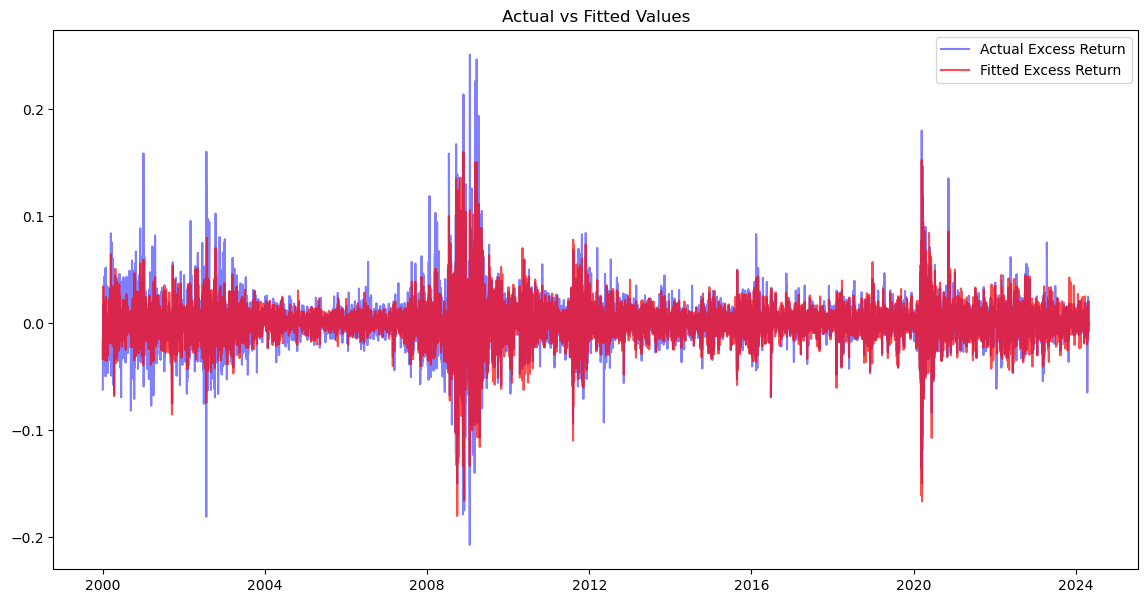

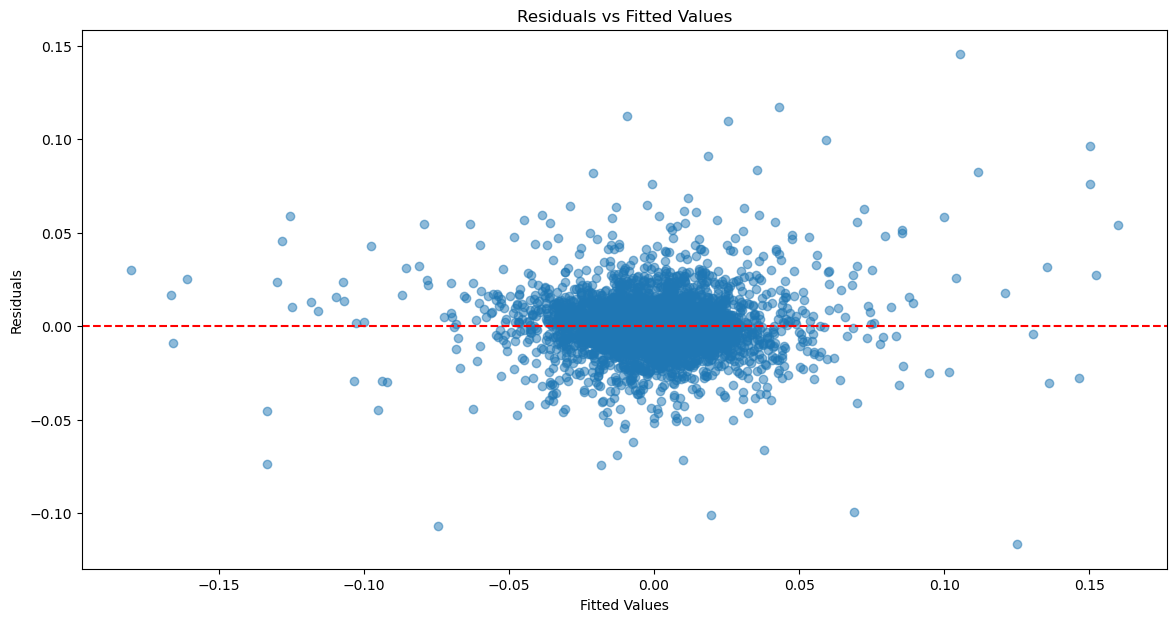

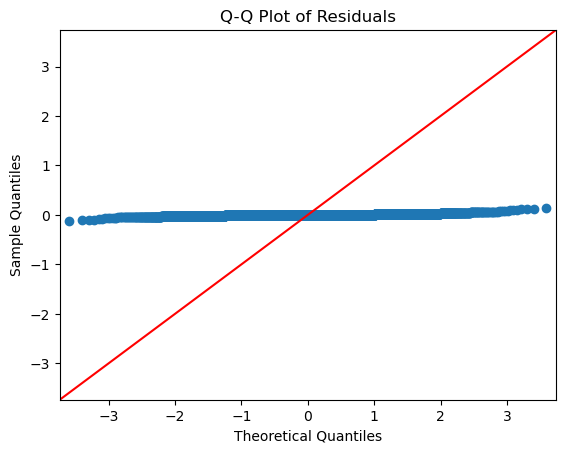

C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

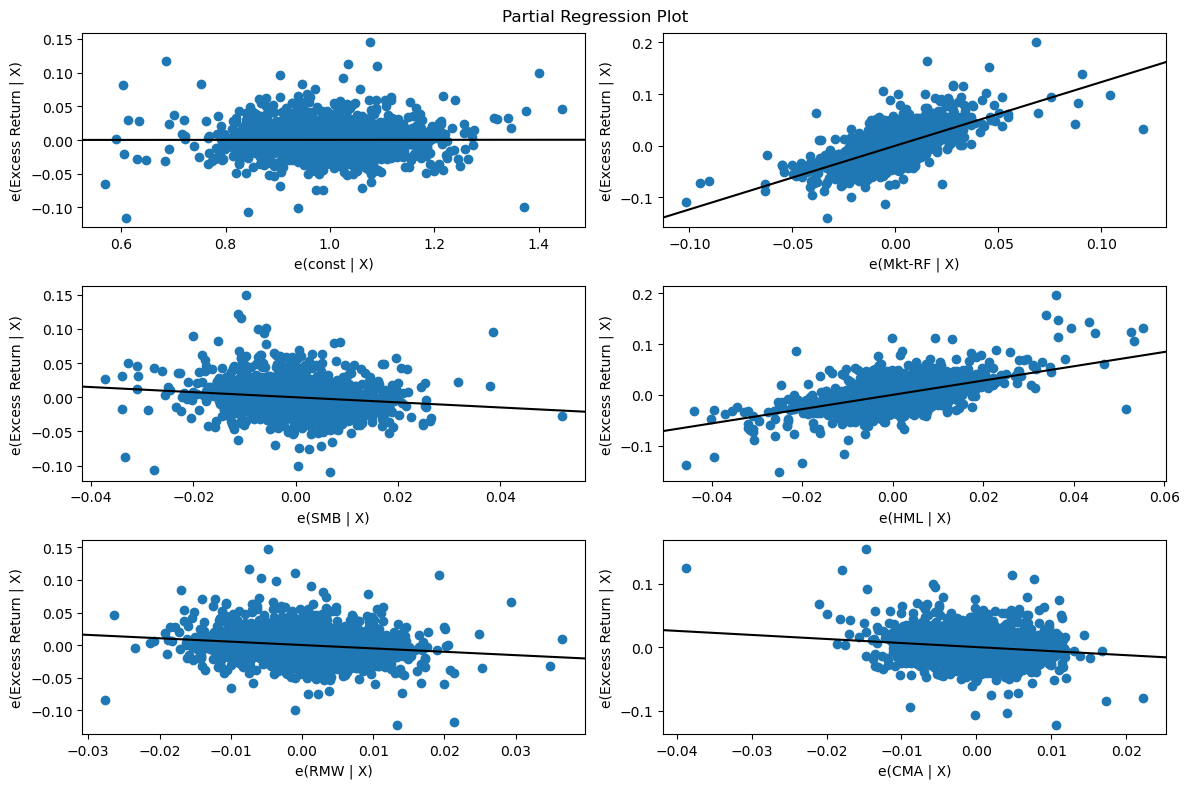

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


data['Fitted'] = model.fittedvalues
data['Residuals'] = model.resid

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Excess Return'], label='Actual Excess Return', color='blue', alpha=0.5)
plt.plot(data.index, data['Fitted'], label='Fitted Excess Return', color='red', alpha=0.7)
plt.title('Actual vs Fitted Values')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(data['Fitted'], data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


sm.qqplot(data['Residuals'], line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()
